## Homework 5: Modeling, Estimation and Gradient Descent
### Due Date: Saturday 11/23, 11:59 PM

We will explore modeling through estimation and prediction. Along the way, we will get experience with an iterative method for guess-and-check called gradient descent. These approaches are helpful throughout data science particularly the field of machine learning. By completing Homework 5, you should take away...

- Practice reasoning about a model and building intuition for loss functions. 

- Determining the gradient of a loss function with respect to model parameters and using the calculations for gradient descent.

We will apply these skills in Homework 6 to a real-world dataset.

### Submission Instructions
For this assignment, you will submit a copy to Gradescope. Follow these steps

1. Download as HTML (`File->Download As->HTML(.html)`). 
1. Open the HTML in the browser. Print to .pdf 
1. Upload to Gradescope. Tag your answers. 

Note that 

- Please map your answers to our questions. Otherwise you may lose points. Please see the rubric below. 
- You should break long lines of code into multiple lines. Otherwise your code will extend out of view from the cell. Consider using `\` followed by a new line. 
- For each textual response, please include relevant code that informed your response. For each plotting question, please include the code used to generate the plot.
- You should not display large output cells such as all rows of a table. Instead convert the input cell from Code to Markdown back to Code to remove the output cell.

Moreover you will submit a copy on Jupyter Hub under Assignments Tab. You cannot access the extension in JupyterLab. So if the URL ends with lab, then please change it to tree 

`https://pds-f19.jupyter.hpc.nyu.edu/user/[Your NetID]/tree`

Consult the instructional video 

`https://nbgrader.readthedocs.io/en/stable/_images/student_assignment.gif` 

for steps to... 
 1. fetch 
 1. modify 
 1. optionally validate
 1. submit your project

Failure to follow these guidelines for submission could mean the deduction of two points. See the rubric below.


### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.


### Rubric

Question | Points
--- | ---
Gradescope | 2
Question 1a | 1
Question 1b | 1
Question 1c | 1
Question 1d | 1
Question 1e | 1
Question 2a | 2
Question 2b | 1
Question 2c | 1
Question 2d | 1
Question 2e | 1
Question 2f | 1
Question 3a | 1
Question 3b | 3
Question 3c | 2
Question 4a | 3
Question 4b | 1
Question 4c | 1
Question 4d | 1
Question 4e | 1
Question 5a | 2
Question 5b | 1
Question 5c | 1
Question 5d | 0
Total | 37

### Getting Started

In [1]:
from IPython.display import display, Markdown

# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
import seaborn as sns

# Set some parameters
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16
np.set_printoptions(4)

In [2]:
# Import a specialized plotting package useful for 3d
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from hw5_utils import plot_3d

# Note that you may need to install plotly to import these packages
# Either execucte the next cell or complete the assignment on JupyterHub

In [3]:
# !pip install plotly
# !conda install -c conda-forge jupyterlab-plotly-extension

## Load Data
Load the data.csv file into a pandas dataframe.  
Note that we are reading the data directly from the URL address.

In [4]:
# Run this cell to load our sample data
data = pd.read_csv("data.csv", index_col=0)
data.head()

,x,y
0,-5.000000,-8.262369
1,-4.966555,-7.692411
2,-4.933110,-7.358698
3,-4.899666,-8.067488
4,-4.866221,-7.834256


---
## 1: A Simple Model
Let's start by examining our data and creating a simple model that can represent this data.

### Question 1
#### Question 1a
First, let's visualize the data in a scatter plot. After implementing the `scatter` function below, you should see something like this:
![scatter](scatter.png)


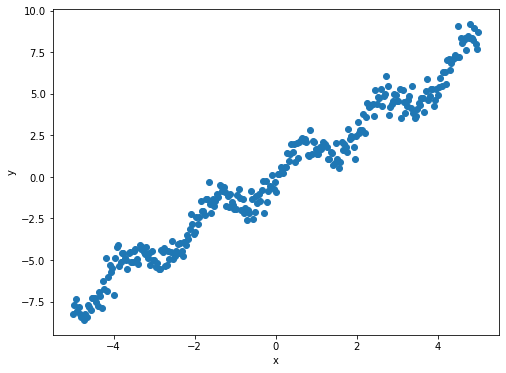

In [5]:
def scatter(x, y):
    """
    Generate a scatter plot using x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    plt.figure(figsize=(8, 6))
    ...
    ### BEGIN SOLUTION
    plt.scatter(x,y)
    plt.xlabel('x')
    plt.ylabel('y')
    ### END SOLUTION

x = data['x']
y = data['y']
scatter(x,y)

#### Question 1b
Describe any significant observations about the distribution of the data. How can you describe the relationship between $x$ and $y$?

### BEGIN SOLUTION
This scatter plot creates an almost linear model, with some bumps 
### END SOLUTION

#### Question 1c
The data looks roughly linear. However it moves up and down away from the line. For now, let's assume that the data follows some underlying linear model. We define the underlying linear model that predicts the value $y$ using the value $x$ as: $f_{\theta^*}(x) = \theta^* \cdot x$

Since we cannot find the value of the population parameter $\theta^*$ exactly, we will assume that our dataset approximates our population and use our dataset to estimate $\theta^*$. We denote our estimation with $\theta$, our fitted estimation with $\hat{\theta}$, and our model as:

$$\Large
f_{\theta}(x) = \theta \cdot x
$$

Based on this equation, define the linear model function `linear_model` below to estimate $\textbf{y}$ (the $y$-values) given $\textbf{x}$ (the $x$-values) and $\theta$. This model is similar to the model you defined in Lab 5: Modeling and Estimation.

In [6]:
def linear_model(x, theta):
    """
    Returns the estimate of y given x and theta

    Keyword arguments:
    x -- the vector of values x
    theta -- the scalar theta
    """
    ### BEGIN SOLUTION
    y = theta*x
    ### END SOLUTION
    return y

In [7]:
assert linear_model(0, 1) == 0
assert np.sum(linear_model(np.array([3, 5]), 3)) == 24

#### Question 1d
In class, we learned that the square loss, sometimes called the $L^2$ loss. Let's use $L^2$ loss to evaluate our estimate $\theta$, which we will use later to identify an optimal $\theta$, represented as $\hat{\theta}$. Define the $L^2$ loss function `l2_loss` below.

In [8]:
def l2_loss(y, y_hat):
    """
    Returns the average l2 loss given y and y_hat

    Keyword arguments:
    y -- the vector of true values y
    y_hat -- the vector of predicted values y_hat
    """
    ### BEGIN SOLUTION
    return np.mean((y - y_hat)**2)
    ### END SOLUTION

In [9]:
assert l2_loss(2, 1) == 1
assert l2_loss(2, 0) == 4 
assert l2_loss(np.array([5, 6]), np.array([1, 1])) == 20.5

#### Question 1e

First, visualize the $L^2$ loss as a function of $\theta$, where several different values of $\theta$ are given. Be sure to label your axes properly. You plot should look something like this:
![avg_l2](l2_avg_loss.png)

What looks like the optimal value, $\hat{\theta}$, based on the visualization? Set `theta_star_guess` to the value of $\theta$ that appears to minimize our loss.

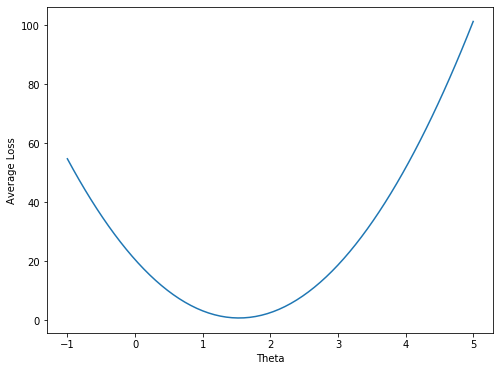

In [11]:
def visualize(x, y, thetas):
    """
    Plots the average l2 loss for given x, y as a function of theta.
    Use the functions you wrote for linear_model and l2_loss.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    thetas -- an array containing different estimates of the scalar theta
    """
    ### BEGIN SOLUTION
    avg_loss = np.array([l2_loss(linear_model(x,theta),y) for theta in thetas]) # Calculate the loss here for each value of theta
    
    plt.figure(figsize=(8,6))
    # Create your plot here
    plt.plot(thetas, avg_loss)
    plt.xlabel('Theta')
    plt.ylabel('Average Loss')
    ### END SOLUTION
    
thetas = np.linspace(-1, 5, 70)
visualize(x, y, thetas)


### BEGIN SOLUTION
theta_star_guess = 1.5
### END SOLUTION

In [12]:
assert l2_loss(3, 2) == 1
assert l2_loss(0, 10) == 100

---
## 2: Fitting our Simple Model
Now that we have defined a simple linear model and loss function, let's begin working on fitting our model to the data.

### Question 2
Let's confirm our visual findings for optimal $\hat{\theta}$.

#### Question 2a
First, find the analytical solution for the optimal $\hat{\theta}$ for average $L^2$ loss. Write up your solution in the cell below using LaTex.

Hint: notice that we now have $\textbf{x}$ and $\textbf{y}$ instead of $x$ and $y$. This means that when writing the loss function $L(\textbf{x}, \textbf{y}, \theta)$, you'll need to take the average of the squared losses for each $y_i$, $f_\theta(x_i)$ pair. 

For tips on getting started, see 
[chapter 10](https://www.textbook.ds100.org/ch/10/modeling_loss_functions.html)
 of the textbook. Note that if you check the [source](https://github.com/DS-100/textbook/tree/master/content/ch/10), you can access the LaTeX code of the book chapter, which you might find handy for typing up your work. Show your work, i.e. don't just write the answer.

### Begin Solution
$L(x,y,\theta) = \frac{1}{n}\sum_{i=1}^{n} (\theta \cdot x_i - y_i)^2$  
$\frac{\partial L}{\partial \theta} = \frac{2}{n}\sum_{i=1}^{n} (\theta \cdot x_i - y_i) \cdot x_i$  
$= \frac{2}{n}(\theta \sum_{i=1}^{n} x_i^2 - \sum_{i=1}^{n} x_i y_i) = 0$  
$\theta^{\ast} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_i^2}$
### End Solution

#### Question 2b
Now that we have the analytic solution for $\hat{\theta}$, implement the function `find_theta` that calculates the numerical value of $\hat{\theta}$ based on our data $\textbf{x}$, $\textbf{y}$.



In [13]:
def find_theta(x, y):
    """
    Find optimal theta given x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    
    ### BEGIN SOLUTION
    theta_opt = np.dot(x,y)/np.dot(x,x)
    ### END SOLUTION
    return theta_opt

In [14]:
t_hat = find_theta(x, y)
print(f'theta_opt = {t_hat}')

assert 1.4 <= t_hat <= 1.6

theta_opt = 1.5372874874787739


#### Question 2c
Now, let's plot our loss function again using the `visualize` function. But this time, add a vertical line at the optimal value of theta (plot the line $x = \hat{\theta}$). Your plot should look something like this:
![vertical_linear](vertical_linear.png)

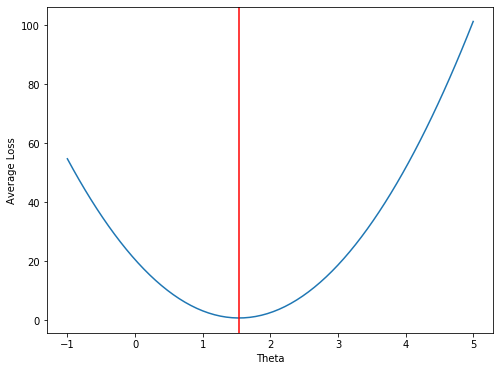

In [15]:
### BEGIN SOLUTION
theta_opt = find_theta(x,y)
visualize(x,y,thetas)
plt.axvline(x = theta_opt, color = "r")
### END SOLUTION

### Question 2d
We now have an optimal value for $\theta$ that minimizes our loss. In the cell below, plot the scatter plot of the data from Question 1a (you can reuse the `scatter` function here). But this time, add the line $f_{\hat{\theta}}(x) = \hat{\theta} \cdot \textbf{x}$ using the $\hat{\theta}$ you computed above. Your plot should look something like this:
![scatter_with_line](scatter_with_line.png)

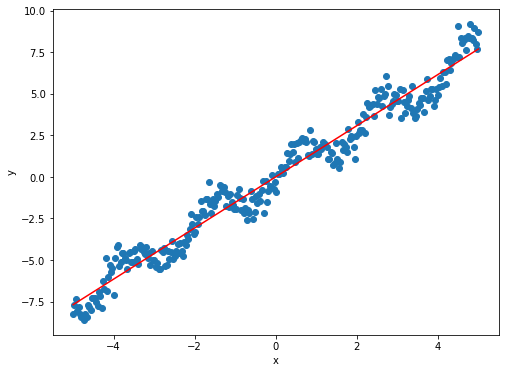

In [16]:
### BEGIN SOLUTION
theta_opt = find_theta(x,y)
scatter(x,y)
line = linear_model(x,theta_opt)
plt.plot(x,line,color = "r")
### END SOLUTION

#### Question 2e
Great! It looks like our estimator $f_{\hat{\theta}}(x)$ is able to capture a lot of the data with a single parameter $\theta$. Now let's try to remove the linear portion of our model from the data to see if we missed anything. 

The remaining data is known as the residual, $\textbf{r}=\textbf{y}-\hat{\theta} \cdot \textbf{x}$. Below, write a function to find the residual and plot the residuals corresponding to $x$ in a scatter plot. Plot a horizontal line at $y=0$ to assist visualization.

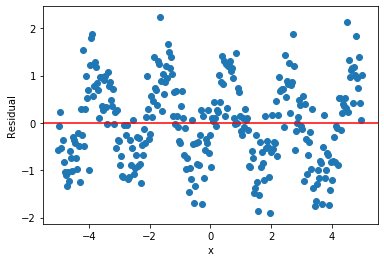

In [17]:
def visualize_residual(x, y):
    """
    Plot a scatter plot of the residuals, the remaining 
    values after removing the linear model from our data.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    
    ### BEGIN SOLUTION
    theta_opt = find_theta(x,y)
    residual = y - linear_model(x,theta_opt)
    plt.scatter(x,residual)
    plt.xlabel("x")
    plt.ylabel("Residual")
    plt.axhline(y = 0, color = "r")
    ### END SOLUTION

visualize_residual(x, y)

#### Question 2f
What does the residual look like? Do you notice a relationship between $x$ and $r$?

### BEGIN SOLUTION
It looks like a sin curve, so it is a sinusodial model
### END SOLUTION

---
## 3: Increasing Model Complexity

It looks like the remaining data is sinusoidal, meaning our original data follows a linear function and a sinusoidal function. Let's define a new model to address this discovery and find optimal parameters to best fit the data:

$$\Large
f_\boldsymbol\theta(x) = \theta_1x + sin(\theta_2x)
$$

Now, our model is parameterized by both $\theta_1$ and $\theta_2$, or composed together, $\boldsymbol{\theta}$.

Note that a generalized sine function $a\sin(bx+c)$ has three parameters: amplitude scaling parameter $a$, frequency parameter $b$ and phase shifting parameter $c$. Looking at the residual plot above, it looks like the residual is zero at x = 0, and the residual swings between -1 and 1. Thus, it seems reasonable to effectively set the scaling and phase shifting parameter ($a$ and $c$ in this case) to 1 and 0 respectively. While we could try to fit $a$ and $c$, we're unlikely to get much benefit. When you're done with the homework, you can try adding $a$ and $c$ to our model and fitting these values to see if you can get a better loss.

#### Question 3a
As in Question 1, fill in the `sin_model` function that predicts $\textbf{y}$ (the $y$-values) using $\textbf{x}$ (the $x$-values), but this time based on our new equation.

*Hint:* Try to do this without using for loops. The `np.sin` function may help you.

In [18]:
def sin_model(x, theta_1, theta_2):
    """
    Predict the estimate of y given x, theta_1, theta_2

    Keyword arguments:
    x -- the vector of values x
    theta_1 -- the scalar value theta_1
    theta_2 -- the scalar value theta_2
    """
    
    ### BEGIN SOLUTION
    y = (theta_1 * x) + np.sin(theta_2 * x)
    ### END SOLUTION
    return y

In [19]:
assert np.isclose(sin_model(1, 1, np.pi), 1.0000000000000002)
# Check that we accept x as arrays
assert len(sin_model(x, 2, 2)) > 1

#### Question 3b
Use the average $L^2$ loss to compute $\frac{\partial L }{\partial \theta_1}, \frac{\partial L }{\partial \theta_2}$. 

First, we will use LaTex to write $L(\textbf{x}, \textbf{y}, \theta_1, \theta_2)$, $\frac{\partial L }{\partial \theta_1}$, and $\frac{\partial L }{\partial \theta_2}$ given $\textbf{x}$, $\textbf{y}$, $\boldsymbol{\theta}$.

You don't need to write out the full derivation. Just the final expression is fine.

### BEGIN SOLUTION
$L(x,y,\theta_1,\theta_2) = \frac{1}{n}\sum_{i=1}^{n}(\theta_1 x_i + \sin(\theta_2 x_i) - y_i)^2$  
$\frac{\partial L }{\partial \theta_1} = \frac{1}{n}\sum_{i=1}^{n} 2(\theta_1 x_i + \sin(\theta_2 x_i) - y_i)\cdot x_i$  
$\frac{\partial L }{\partial \theta_2} = \frac{1}{n}\sum_{i=1}^{n} 2(\theta_1 x_i + \sin(\theta_2 x_i) - y_i)\cdot \cos(\theta_2 x_i)\cdot x_i$
### END SOLUTION

#### Question 3c
Now, implement the functions `dt1` and `dt2`, which should compute $\frac{\partial L }{\partial \theta_1}$ and $\frac{\partial L }{\partial \theta_2}$ respectively. Use the formulas you wrote for $\frac{\partial L }{\partial \theta_1}$ and $\frac{\partial L }{\partial \theta_2}$ in the previous exercise. In the functions below, the parameter `theta` is a vector that looks like $( \theta_1, \theta_2 )$.

Note: To keep your code a bit more concise, be aware that `np.mean` does the same thing as `np.sum` divided by the length of the numpy array.

In [20]:
def dt1(x, y, theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_1

    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    ### BEGIN SOLUTION
    theta1 = theta[0]
    theta2 = theta[1]
    return np.mean(2*(sin_model(x, theta1, theta2)-y)*x)
    ### END SOLUTION

In [21]:
def dt2(x, y, theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_2

    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    
    ### BEGIN SOLUTION
    theta1 = theta[0]
    theta2 = theta[1]
    return np.mean(2*(sin_model(x, theta1, theta2)-y)*np.cos(theta2*x)*x)
    ### END SOLUTION

In [22]:
# This function calls dt1 and dt2 and returns the gradient dt. It is already implemented for you.
def dt(x, y, theta):
    """
    Returns the gradient of l2 loss with respect to vector theta

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta
    """
    return np.array([dt1(x,y,theta), dt2(x,y,theta)])

In [23]:
assert np.isclose(dt1(x, y, [0, np.pi]), -25.376660670924529, rtol=0.5)

---
### 4: Gradient Descent
We cannot try to solve for the optimal $\hat{\theta}$ exactly. We resort to an algorithm for guess-and-check to iteratively find an approximate solution. So let's try implementing  gradient descent.

### Question 4

#### Question 4a
Implement the `grad_desc` function that performs gradient descent for a finite number of iterations. This function takes in an array for $\textbf{x}$ (`x`), an array for $\textbf{y}$ (`y`), and an initial value for $\theta$ (`theta`). `alpha` will be the learning rate (or step size, whichever term you prefer). In this part, we'll use a static learning rate that is the same at every time step.

At each time step, use the gradient and `alpha` to update your current `theta`. Also at each time step, be sure to save the current `theta` in `theta_history`, along with the $L^2$ loss (computed with the current `theta`) in `loss_history`.

Hints:
- Write out the gradient update equation (1 step). What variables will you need for each gradient update? Of these variables, which ones do you already have, and which ones will you need to recompute at each time step?
- You may need a loop here to update `theta` several times
- Recall that the gradient descent update function follows the form:
$$\large
\boldsymbol\theta^{(t+1)} \leftarrow \boldsymbol\theta^{(t)} - \alpha \left(\nabla_\boldsymbol\theta \mathbf{L}(\textbf{x}, \textbf{y}, \boldsymbol\theta^{(t)}) \right)
$$

In [24]:
# Run me
def init_t():
    """Creates an initial theta [0, 0] of shape (2,) as a starting point for gradient descent"""
    return np.zeros((2,))

In [25]:
def grad_desc(x, y, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and static learning rate

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta to use at first iteration
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []
    

    ### BEGIN SOLUTION
    for i in range(num_iter):
        d_t = dt(x,y,theta)
        theta = theta - alpha*d_t
        theta_history.append(theta)
        loss_history.append(l2_loss(sin_model(x, theta[0], theta[1]), y))
    ### END SOLUTION
    return theta, theta_history, loss_history

In [26]:
t = init_t()
t_est, ts, loss = grad_desc(x, y, t, num_iter=20, alpha=0.1)

assert len(ts) == len(loss) == 20 # theta history and loss history are 20 items in them
assert ts[0].shape == (2,) # theta history contains theta values
assert np.isscalar(loss[0]) # loss history is a list of scalar values, not vector
assert loss[1] - loss[-1] > 0 # loss is decreasing

#### Question 4b
Now, let's try using a decaying learning rate. Implement `grad_desc_decay` below, which performs gradient descent with a learning rate that decreases slightly with each time step. You should be able to copy most of your work from the previous part, but you'll need to tweak how you update `theta` at each time step.

By decaying learning rate, we mean instead of just a number $\alpha$, the learning should be now $\frac{\alpha}{i+1}$ where $i$ is the current number of iteration. (Why do we need to add '+ 1' in the denominator?)

In [27]:
def grad_desc_decay(x, y, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and decaying learning rate

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta
    num_iter -- the max number of iterations
    alpha -- the learning rate
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []
    
    ### BEGIN SOLUTION
    for i in range(num_iter):
        d_t = dt(x,y,theta)
        theta = theta - (alpha)/(i + 1)*d_t
        theta_history.append(theta)
        loss_history.append(l2_loss(sin_model(x, theta[0], theta[1]), y))
    ### END SOLUTION
    return theta, theta_history, loss_history

In [28]:
t = init_t()
t_est_decay, ts_decay, loss_decay = grad_desc_decay(x, y, t, num_iter=20, alpha=0.1)

assert len(ts_decay) == len(loss_decay) == 20 # theta history and loss history are 20 items in them
assert ts_decay[0].shape == (2,) # theta history contains theta values
assert np.isscalar(loss[0]) # loss history should be a list of values, not vector
assert loss_decay[1] - loss_decay[-1] > 0 # loss is decreasing

#### Question 4c
Let's visually inspect our results of running gradient descent to optimize $\boldsymbol\theta$. Plot our $x$-values with our model's predicted $y$-values over the original scatter plot. Did gradient descent successfully optimize $\boldsymbol\theta$?

In [29]:
# Run me
t = init_t()
t_est, ts, loss = grad_desc(x, y, t)

t = init_t()
t_est_decay, ts_decay, loss_decay = grad_desc_decay(x, y, t)

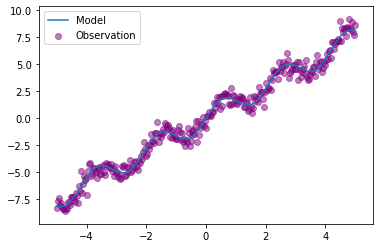

In [30]:
y_pred = sin_model(x, t_est[0], t_est[1])

plt.plot(x, y_pred, label='Model')
plt.scatter(x, y, alpha=0.5, label='Observation', color='purple')
plt.legend();

### BEGIN SOLUTION

Yes, the thin blue line seems to follow the scatter plot, so the gradient descent did successfully optimize

### END SOLUTION

#### Question 4d
Let's compare our two gradient descent methods and see how they differ. Plot the loss values over each iteration of gradient descent for both static learning rate and decaying learning rate. 

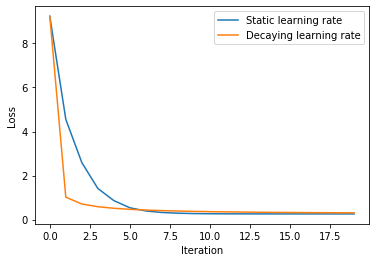

In [31]:
### BEGIN SOLUTION
plt.plot(np.arange(len(loss)),loss,label = "Static learning rate") # Plot of loss history for static learning rate
plt.plot(np.arange(len(loss)),loss_decay,label = "Decaying learning rate") # Plot of loss history for decaying learning rate
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
### END SOLUTION

#### Question 4e
Compare and contrast the performance of the two gradient descent methods. Which method begins to converge more quickly?

### BEGIN SOLUTION

While both gradient descent methods converge at fast rates and minimize the loss, the decaying method converges more quickly

### END SOLUTION

---
## 5: Visualizing Loss

### Question 5:
Let's visualize our loss functions and gain some insight as to how gradient descent and stochastic gradient descent are optimizing our model parameters.

#### Question 5a: 
In the previous plot is about the loss decrease over time, but what exactly is path the theta value? Run the following three cells. 

In [32]:
# Run me
ts = np.array(ts).squeeze()
ts_decay = np.array(ts_decay).squeeze()
loss = np.array(loss)
loss_decay = np.array(loss_decay)

In [33]:
# Run me to see a 3D plot (gradient descent with static alpha)
plot_3d(ts[:, 0], ts[:, 1], loss, l2_loss, sin_model, x, y)

In [34]:
# Run me to see another 3D plot (gradient descent with decaying alpha)
plot_3d(ts_decay[:, 0], ts_decay[:, 1], loss_decay, l2_loss, sin_model, x, y)

In the following cell, write 1-2 sentences about the differences between using a static learning rate and a learning rate with decay for gradient descent. Use the loss history plot as well as the two 3D visualization to support your answer.

The two gradient descent methods differs in ...

### BEGIN SOLUTION
In the original graph, we saw how the static learning rate took longer to converge in comparison to the decaying learning rate. In this 3D visualization we see how the static learning rate swings back and forth until it finds the minimum, meanwhile the decaying learning rate finds the minimum much quicker without the back and forth oscilation
### END SOLUTION

#### Question 5b:

Another common way of visualizing 3D dynamics is with a _contour_ plot. Please run the following cell.

In [35]:
def contour_plot(title, theta_history, loss_function, model, x, y):
    """
    The function takes the following as argument:
        theta_history: a (N, 2) array of theta history
        loss: a list or array of loss value
        loss_function: for example, l2_loss
        model: for example, sin_model
        x: the original x input
        y: the original y output
    """
    theta_1_series = theta_history[:,0] # a list or array of theta_1 value
    theta_2_series = theta_history[:,1] # a list or array of theta_2 value
    
    # Create trace of theta point
    # Uncomment the following lines and fill in the TODOS
#     thata_points = go.Scatter(name="Theta Values", 
#                               x=..., #TODO
#                               y=..., #TODO
#                               mode="lines+markers")

    ## In the following block of code, we generate the z value
    ## across a 2D grid
    t1_s = np.linspace(np.min(theta_1_series) - 0.1, np.max(theta_1_series) + 0.1)
    t2_s = np.linspace(np.min(theta_2_series) - 0.1, np.max(theta_2_series) + 0.1)

    x_s, y_s = np.meshgrid(t1_s, t2_s)
    data = np.stack([x_s.flatten(), y_s.flatten()]).T
    ls = []
    for t1, t2 in data:
        l = loss_function(model(x, t1, t2), y)
        ls.append(l)
    z = np.array(ls).reshape(50, 50)
    
    # Create the contour 
    # Uncomment the following lines and fill in the TODOS
#     lr_loss_contours = go.Contour(x=..., #TODO 
#                                   y=..., #TODO
#                                   z=..., #TODO
#                                   colorscale='Viridis', reversescale=True)
    
    
    thata_points = go.Scatter(name="Theta Values", 
                              x=theta_1_series, 
                              y=theta_2_series,
                              mode="lines+markers")
    lr_loss_contours = go.Contour(x=t1_s, 
                                  y=t2_s, 
                                  z=z, 
                                  colorscale='Viridis', reversescale=True)

    plotly.offline.iplot(go.Figure(data=[lr_loss_contours, thata_points], layout={'title': title}))

In [36]:
# Run this
contour_plot('Gradient Descent with Static Learning Rate', ts, l2_loss, sin_model, x, y)

In [37]:
## Run me
contour_plot('Gradient Descent with Decay Learning Rate', ts_decay, l2_loss, sin_model, x, y)

In the following cells, write down the answer to the following questions:
- How do you interpret the two contour plots? 
- Compare contour plot and 3D plot, what are the pros and cons of each? 

From reading these two contour plots, I can see that...

### BEGIN SOLUTION
I can see that the yellow in both plots are around the minimum value(1.5), and that both the static and decaying learning rate seem to converge in the yellow areas.  
A contour plot is like a 2D rendering of the information the 3D plot gives, where the learning rate is converging, and what its minimum value is. While it is pretty simple to interpret, it makes it difficult to see the shape of the convergence of the learning rate. Something that the 3D plot does really well. Yet, the 3D plot does make it more diffucult to determine where the minimum value is. Given this information, I think it would be helpful to look at both plots for a certain learning rate, to get more insight and information to how the learning rate is acting, and where or how it is converging

### END SOLUTION

### Question 5c
Try adding the two additional model parameters for phase and amplitude that we ignored (see 3a). What are the optimal phase and amplitude values for your four parameter model? Do you get a better loss?

I think...

In [40]:
### Template from  HW5_Q5b_contour_plot.py 
def full_sin_model(x, theta_1, theta_2, theta_3, theta_4):
    """
    Predict the estimate of y given x, theta_1, theta_2, theta_3, theta_4
    Keyword arguments:
    x -- the vector of values x
    theta_1 -- the scalar value theta_1
    theta_2 -- the scalar value theta_2
    theta_3 -- the scalar value theta_3
    theta_4 -- the scalar value theta_4
    """
    y = (theta_1 * x) + theta_3 * np.sin(theta_2 * x + theta_4)
    # YOUR CODE HERE
    raise NotImplementedError()
    return y


# Run me
def full_sin_model_init_t():
    """Creates an initial theta of random values from 0-1 of shape (4,) as a starting point for gradient descent"""
    return np.random.rand((4))


def full_sin_model_dt1(x, y, theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_1
    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    theta1 = theta[0]
    theta2 = theta[1]
    return np.mean(2*(sin_model(x, theta1, theta2)-y)*x)
    raise NotImplementedError()


def full_sin_model_dt2(x, y, theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_2
    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    theta1 = theta[0]
    theta2 = theta[1]
    return np.mean(2*(sin_model(x, theta1, theta2)-y)*np.cos(theta2*x)*x)
    raise NotImplementedError()


### I had trouble computing the derivatives with respect to theta3 and theta 4 for the partial l2 loss, 
### so thats where i got stuck and couldn't move forward
def full_sin_model_dt3(x, y, theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_3
    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    ...
    # YOUR CODE HERE
    raise NotImplementedError()


def full_sin_model_dt4(x, y, theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_4
    Keyword arguments:
    x -- the vector of all x values
    y -- the vector of all y values
    theta -- the vector of values theta
    """
    ...
    # YOUR CODE HERE
    raise NotImplementedError()


# This function calls dt1, dt2, dt3, and dt4 and returns the gradient dt. It is already implemented for you.
def full_sin_model_dt(x, y, theta):
    """
    Returns the gradient of l2 loss with respect to vector theta
    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta
    """
    return np.array([full_sin_model_dt1(x, y, theta), full_sin_model_dt2(x, y, theta), full_sin_model_dt3(x, y, theta), full_sin_model_dt4(x, y, theta)])


def full_sin_model_grad_desc(x, y, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and static learning rate
    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    theta -- the vector of values theta to use at first iteration
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []

    ### BEGIN SOLUTION
    for i in range(num_iter):
        d_t = dt(x,y,theta)
        theta = theta - alpha*d_t
        theta_history.append(theta)
        loss_history.append(l2_loss(sin_model(x, theta[0], theta[1]), y))
    ### END SOLUTION
    return theta, theta_history, loss_history

### Question 5d (optional)

It looks like our basic two parameter model, a combination of a linear function and sinusoidal function, was able to almost perfectly fit our data. It turns out that many real world scenarios come from relatively simple models. 

At the same time, the real world can be incredibly complex and a simple model wouldn't work so well. Consider the example below; it is neither linear, nor sinusoidal, nor quadratic. 

Optional: Suggest how we could iteratively create a model to fit this data and how we might improve our results. 

Extra optional: Try and build a model that fits this data.

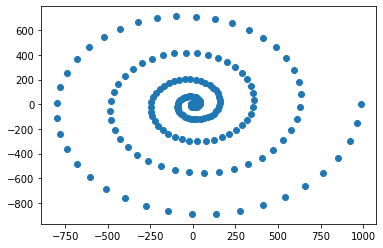

In [39]:
x = []
y = []
for t in np.linspace(0,10*np.pi, 200):
    r = ((t)**2)
    x.append(r*np.cos(t))
    y.append(r*np.sin(t))

plt.scatter(x,y)  
plt.show()

It would be a combination of a sinusoidal and a cosinusoidal, to make this circular shape